Limpieza base de datos

In [1]:
#importación de librerias
import pandas as pd

In [2]:
#importación base de datos
df=pd.read_csv('train_NEW.csv')

#Introducir Destination Country
# Crear el diccionario de sustitución
reemplazo = {0: "China", 1: "India", 2: "Russian Federation", 3: "United Arab Emirates", 4: "Austria", 5: "Germany", 6: "Greece", 7: "Italy", 8: "Turkey", 9: "Belgium", 10: "Egypt", 11: "France", 12: "Morocco", 13: "Spain", 14: "Switzerland", 15: "United Kingdom", 16: "South Africa", 17: "United States", 18: "Canada", 19: "Czech Republic", 20: "Ukraine", 21: "Netherlands", 22: "Thailand", 23: "Denmark", 24: "Qatar"}

# Sustituir los valores
df['Destination Country'].replace(reemplazo, inplace=True)

#transformar el tipo de dato de la columna Date en datetime
df['Date'] = pd.to_datetime(df['Date'])

#transformar el tipo de datos a int
df["Total flights"] = df["Total flights"].str.replace(",", "").astype(int)
df['Total seats'] = df['Total seats'].str.replace(",", "").astype(int)
df['Total ASKs'] = df['Total ASKs'].str.replace(",", "").astype(int)




In [3]:
#comprobar nans
df.isnull().sum()

Date                     0
Origin Country           0
Origin Continent         0
Destination Country      0
Destination Continent    0
Total flights            0
Total seats              0
Total ASKs               0
dtype: int64

In [4]:
#comprobar dublicados
df.duplicated().sum()

0

In [5]:
#crear columna con la media de asientos por vuelo
df['Average seat per flight'] = df['Total seats'] / df['Total flights']
df.head()

#crear columna con la media de ASKs por vuelo
df['Average ask per flight'] = df['Total ASKs'] / df['Total flights']
df.head()

,Date,Origin Country,Origin Continent,Destination Country,Destination Continent,Total flights,Total seats,Total ASKs,Average seat per flight,Average ask per flight
0,2009-07-01,United Kingdom,Europe,Spain,Europe,9032,1531683,2447559137,169.584035,270987.504097
1,2008-04-01,Lebanon,Middle East,Belgium,Europe,5,760,2389940,152.000000,477988.000000
2,2005-04-01,Switzerland,Europe,France,Europe,1471,158661,66533450,107.859279,45230.081577
3,2016-08-01,Israel,Middle East,Czech Republic,Europe,117,23366,61557637,199.709402,526133.649573
4,2019-02-01,Albania,Europe,Turkey,Europe,80,12854,9837347,160.675000,122966.837500


Primer análisis de la base de datos

In [6]:
#Comprobamos cúales són las rutas cón más vuelos
#agrupar vuelos con mismo Origin Country y mismo Destination Country
df_grouped = df.groupby(['Origin Country', 'Destination Country']).agg({'Total flights': 'sum', 'Total seats': 'sum', 'Total ASKs': 'sum',})
#ordenar por total flights
df_grouped = df_grouped.sort_values(by='Total flights', ascending=False)

#transformar indice a columna
df_grouped.reset_index(inplace=True)


#crear columna de concatenar Origin Country y Destination Country
df_grouped['Origin-Destination'] = df_grouped['Origin Country'] + ' - ' + df_grouped['Destination Country']
df_rutas=df_grouped[['Origin-Destination', 'Total flights', 'Total seats', 'Total ASKs']]
df_rutas.head(15)

,Origin-Destination,Total flights,Total seats,Total ASKs
0,United States - United States,122110915,12266317361,16475458883996
1,China - China,37130654,5768921272,6717650384252
2,Canada - Canada,10914211,720474941,803921025232
3,India - India,8367460,1240511260,1109039277120
4,Russian Federation - Russian Federation,5508537,679629604,1209026112919
5,Spain - Spain,4764144,615578219,403124125708
6,United Kingdom - United Kingdom,4759346,431533744,180691189899
7,France - France,3884158,451429947,262076619199
8,Germany - Germany,3670973,472327348,202837152135
9,Italy - Italy,3632011,525509502,315303036798


/tmp/ipykernel_21470/2399433166.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rutas.sort_values(by='Total flights', ascending=False, inplace=True)


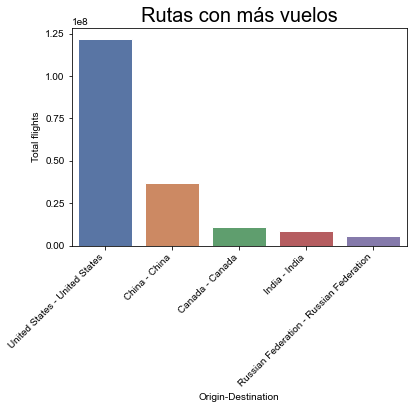

In [7]:
#grafico barras Origin-Destination y Total flights de los 20 mejores vuelos de cada ruta
import matplotlib.pyplot as plt
import seaborn as sns
df_rutas.sort_values(by='Total flights', ascending=False, inplace=True)


plt.title('Rutas con más vuelos', fontsize=20)
sns.set(style="darkgrid")
sns.set(rc={'figure.figsize':(30,20)})
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 3.5})

g = sns.barplot(x='Origin-Destination', y='Total flights', data=df_rutas.head(5))
g.set_xticklabels(g.get_xticklabels(), rotation=90)
plt.xticks(rotation=45, ha='right')

plt.show()


Podemos ver cómo hasta la ruta número 11 no encontramos una ruta internacional por lo cual procedemos a comparar el número de rutas nacionales vs internacionalcionales

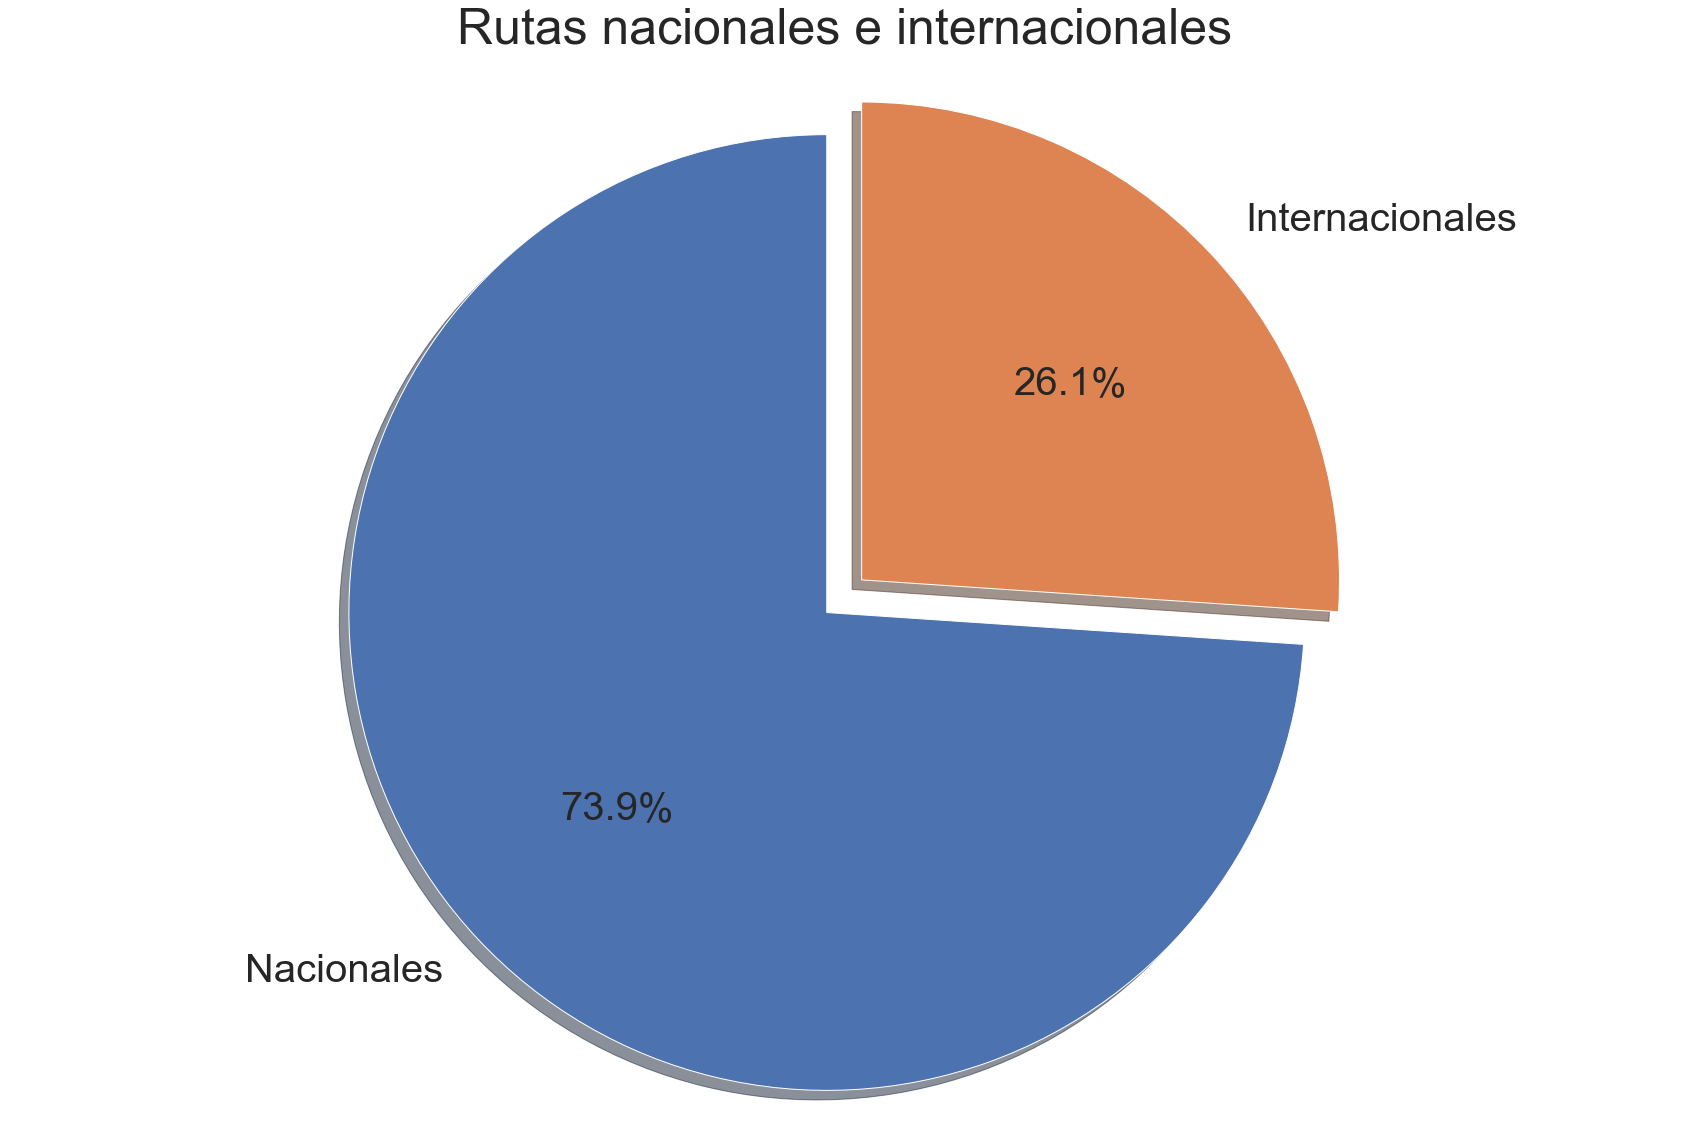

In [8]:
#compartiva entre rutas nacionales e internacionales
total_vuelos_nacionales =df_grouped[df_grouped['Origin Country'] == df_grouped['Destination Country']]['Total flights'].sum()
total_vuelos_internacionales=df_grouped[df_grouped['Origin Country'] != df_grouped['Destination Country']]['Total flights'].sum()

import matplotlib.pyplot as plt
labels = 'Nacionales', 'Internacionales'
sizes = [total_vuelos_nacionales, total_vuelos_internacionales]
explode = (0.1, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')
fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
    shadow=True, startangle=90, textprops={'fontsize': 40})
#ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
 #   shadow=True, startangle=90, textprops={'fontsize': 20})

ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Rutas nacionales e internacionales',fontsize=50)
plt.show()



Vemos cómo casi 3/4 de los vuelos són nacionales y 1/4 de los vuelos son internacionales.

In [9]:
#rutas con mas media de asientos
df_rutas['Average seat per flight'] = df_rutas['Total seats'] / df_rutas['Total flights']
df_rutas.sort_values(by='Average seat per flight', ascending=False, inplace=True)
df_rutas.head()

/tmp/ipykernel_21470/337132472.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rutas['Average seat per flight'] = df_rutas['Total seats'] / df_rutas['Total flights']
/tmp/ipykernel_21470/337132472.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rutas.sort_values(by='Average seat per flight', ascending=False, inplace=True)


,Origin-Destination,Total flights,Total seats,Total ASKs,Average seat per flight
1680,New Zealand - United Arab Emirates,1152,515383,7307265450,447.381076
997,Mauritius - United Arab Emirates,7087,3110216,15737001111,438.862142
1450,Taiwan - United Arab Emirates,2385,1016126,6683149869,426.048637
2373,Bangladesh - Austria,1,419,2889440,419.000000
599,Reunion - France,20094,8350990,77514948628,415.596198


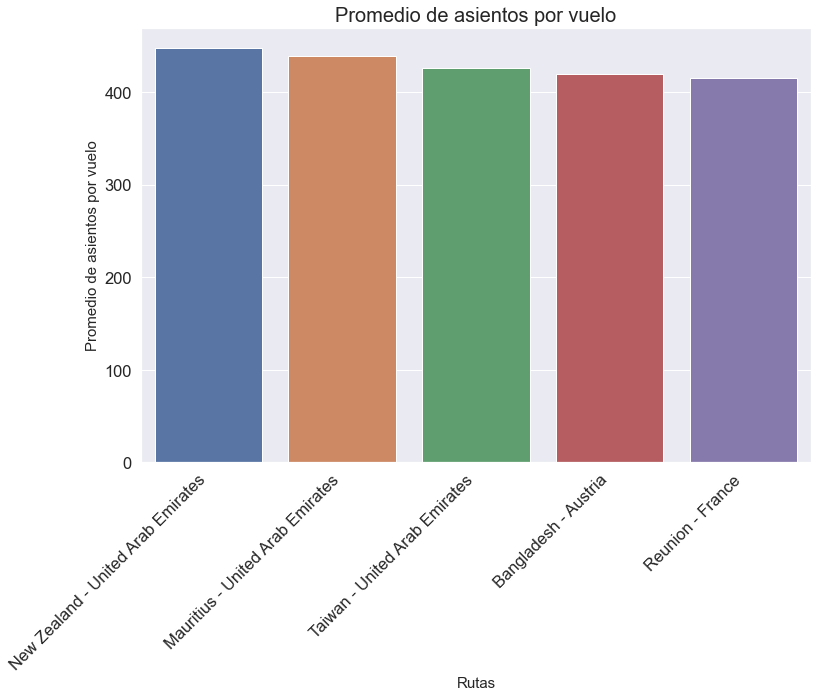

In [10]:
df_rutas=df_rutas.head(5)
df_rutas.sort_values(by='Average seat per flight', ascending=False, inplace=True)

sns.set(style="darkgrid")
sns.set(rc={'figure.figsize':(12,8)})
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 3.5})

sns.barplot(x='Origin-Destination', y='Average seat per flight', data=df_rutas)
plt.title("Promedio de asientos por vuelo", fontsize=20)
plt.xlabel("Rutas", fontsize=15)
plt.ylabel("Promedio de asientos por vuelo", fontsize=15)
plt.xticks(rotation=45, ha='right')
plt.show()

In [11]:
#vuelos con mas ASKs
df_rutas['Average ask per flight'] = df_rutas['Total ASKs'] / df_rutas['Total flights']
df_rutas.sort_values(by='Average ask per flight', ascending=False, inplace=True)
df_rutas.head()

,Origin-Destination,Total flights,Total seats,Total ASKs,Average seat per flight,Average ask per flight
1680,New Zealand - United Arab Emirates,1152,515383,7307265450,447.381076,6.343112e+06
599,Reunion - France,20094,8350990,77514948628,415.596198,3.857617e+06
2373,Bangladesh - Austria,1,419,2889440,419.000000,2.889440e+06
1450,Taiwan - United Arab Emirates,2385,1016126,6683149869,426.048637,2.802159e+06
997,Mauritius - United Arab Emirates,7087,3110216,15737001111,438.862142,2.220545e+06


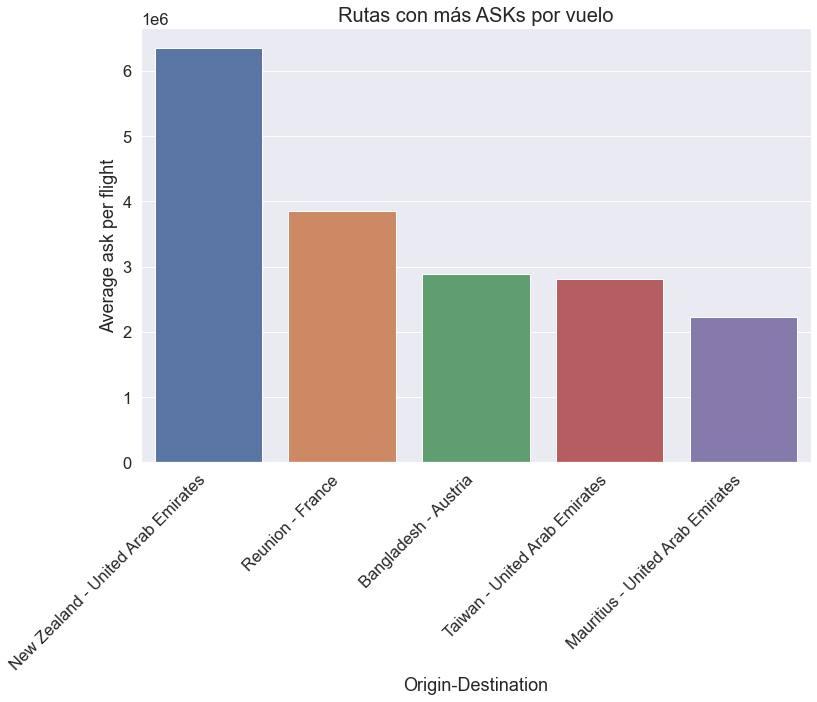

In [12]:
plt.title('Rutas con más ASKs', fontsize=20)
sns.set(style="darkgrid")
sns.set(rc={'figure.figsize':(30,20)})
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 3.5})

g = sns.barplot(x='Origin-Destination', y='Average ask per flight', data=df_rutas.head(5))
g.set_xticklabels(g.get_xticklabels(), rotation=90)
plt.xticks(rotation=45, ha='right')

plt.show()

In [13]:
#Total flights ordenado de mayor a menor
df.sort_values(by=['Total flights'], ascending=False, inplace=True)
df.head()

,Date,Origin Country,Origin Continent,Destination Country,Destination Continent,Total flights,Total seats,Total ASKs,Average seat per flight,Average ask per flight
190994,2005-08-01,United States,North America,United States,North America,902944,82547758,105869197041,91.420684,117248.906954
238683,2005-07-01,United States,North America,United States,North America,897853,82636320,106648899907,92.037694,118782.139066
4972,2004-08-01,United States,North America,United States,North America,890930,81387713,104799006345,91.351411,117628.777059
65546,2005-03-01,United States,North America,United States,North America,886125,81811153,103273093609,92.324619,116544.611211
145935,2004-07-01,United States,North America,United States,North America,877824,80450994,104112201370,91.648205,118602.591602


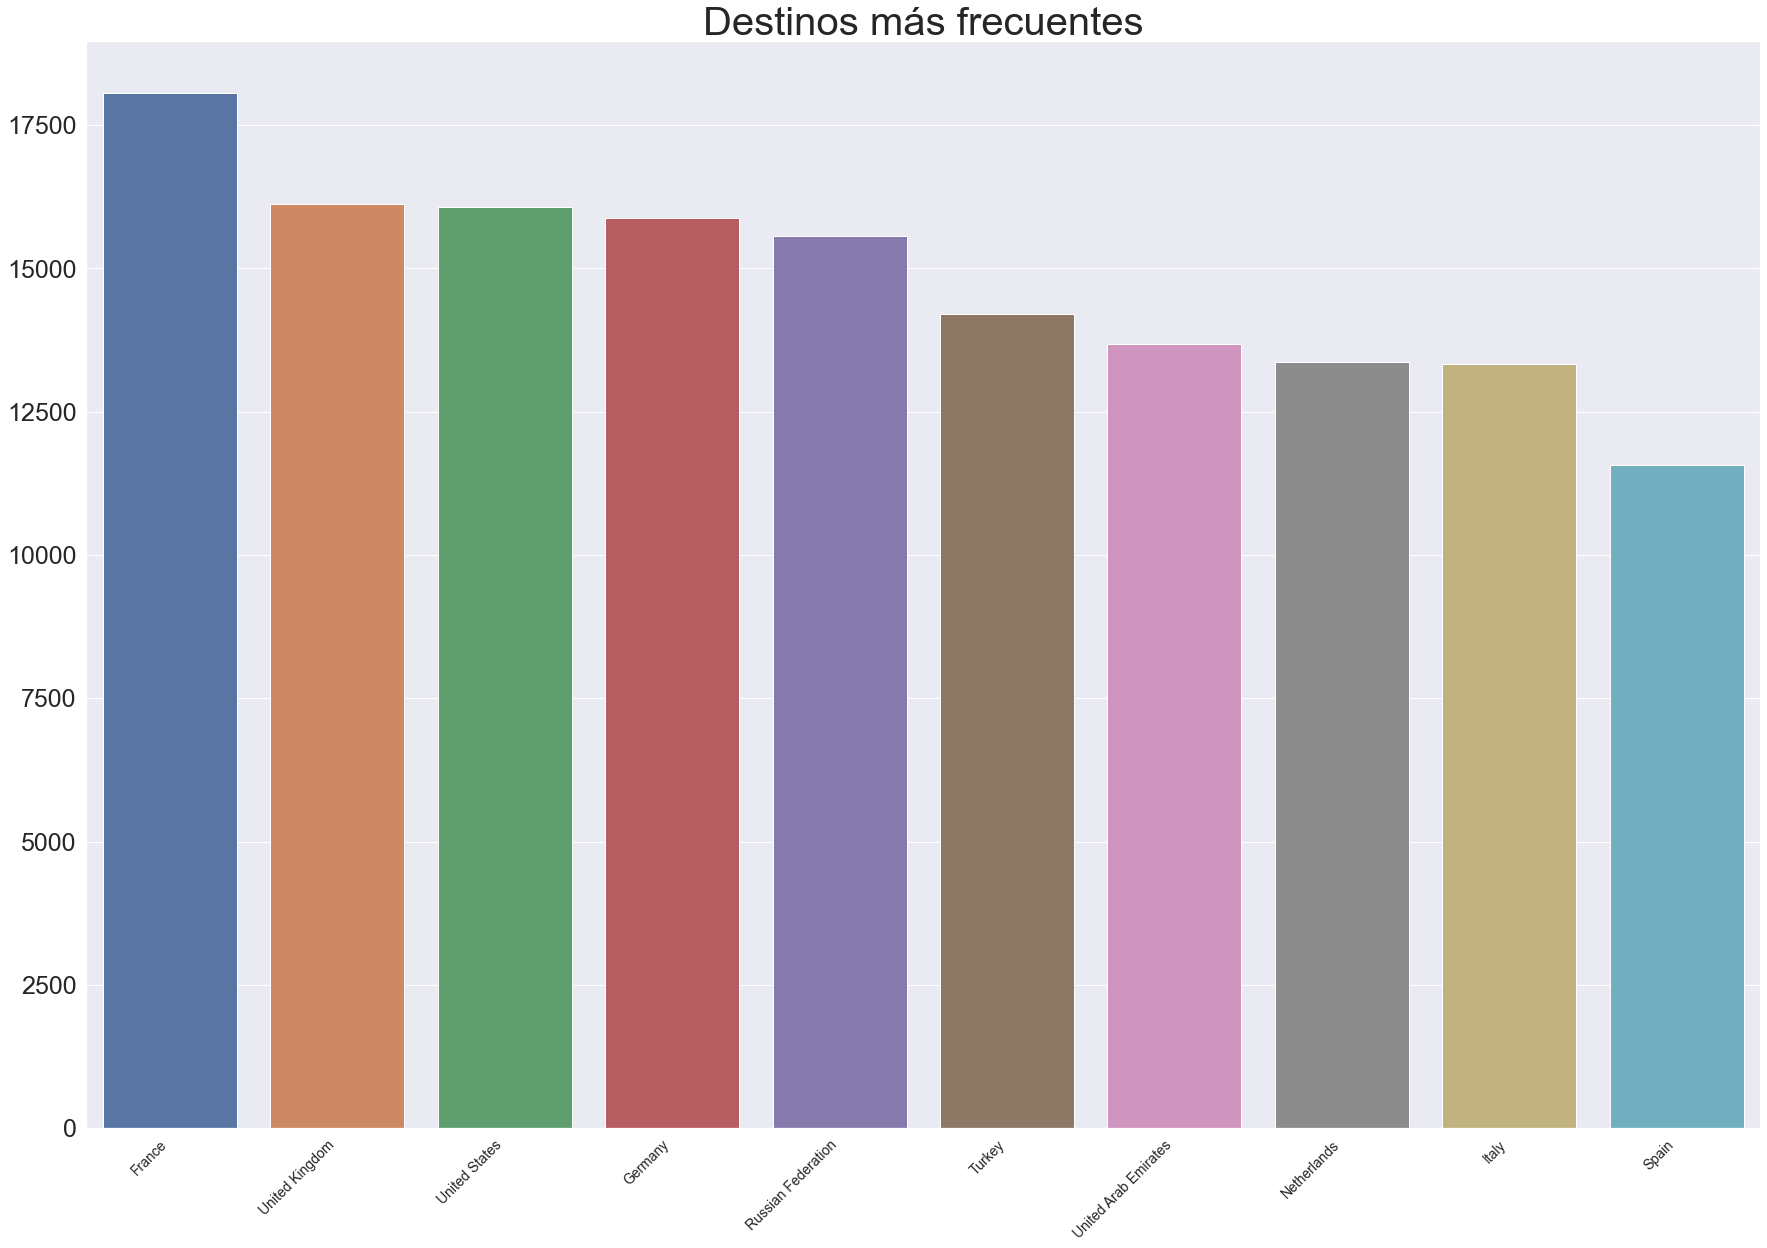

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.title('Destinos más frecuentes', fontsize=40)

# Obtener los primeros 10 países de destino más frecuentes
top_10_destination_countries = df['Destination Country'].value_counts().head(10)

# Crear un gráfico de barras usando seaborn
sns.barplot(x=top_10_destination_countries.index, y=top_10_destination_countries.values)

plt.xticks(fontsize=14)
plt.yticks(fontsize=25)
plt.xticks(rotation=45, ha='right')

# Mostrar el gráfico
plt.show()


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 276982 entries, 190994 to 19935
Data columns (total 10 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   Date                     276982 non-null  datetime64[ns]
 1   Origin Country           276982 non-null  object        
 2   Origin Continent         276982 non-null  object        
 3   Destination Country      276982 non-null  object        
 4   Destination Continent    276982 non-null  object        
 5   Total flights            276982 non-null  int64         
 6   Total seats              276982 non-null  int64         
 7   Total ASKs               276982 non-null  int64         
 8   Average seat per flight  276982 non-null  float64       
 9   Average ask per flight   276982 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(3), object(4)
memory usage: 23.2+ MB


In [16]:
#total vuelos
df['Total flights'].sum()

289937391

In [17]:
#vuelos por mes ordenado por fecha
df['Total flights'].groupby(df['Date'].dt.month).sum().sort_values(ascending=False).reset_index()

,Date,Total flights
0,6,26327904
1,7,25319301
2,3,25275867
3,8,25226123
4,4,25096884
5,9,25015076
6,10,24334115
7,5,24054729
8,1,23821137
9,12,22221240


In [18]:
#fechas unicas ordenadas creciente

df_fechas=df['Date'].unique()
#df_fechas a DataFrame
df_fechas=pd.DataFrame(df_fechas)
df_fechas.head()
df_fechas.value_counts(ascending=False).head(-10)

2004-01-01    1
2015-09-01    1
2014-11-01    1
2014-12-01    1
2015-01-01    1
             ..
2009-01-01    1
2009-02-01    1
2009-03-01    1
2009-04-01    1
2009-05-01    1
Length: 194, dtype: int64

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 276982 entries, 190994 to 19935
Data columns (total 10 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   Date                     276982 non-null  datetime64[ns]
 1   Origin Country           276982 non-null  object        
 2   Origin Continent         276982 non-null  object        
 3   Destination Country      276982 non-null  object        
 4   Destination Continent    276982 non-null  object        
 5   Total flights            276982 non-null  int64         
 6   Total seats              276982 non-null  int64         
 7   Total ASKs               276982 non-null  int64         
 8   Average seat per flight  276982 non-null  float64       
 9   Average ask per flight   276982 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(3), object(4)
memory usage: 23.2+ MB


In [20]:
df.isnull().sum()

Date                       0
Origin Country             0
Origin Continent           0
Destination Country        0
Destination Continent      0
Total flights              0
Total seats                0
Total ASKs                 0
Average seat per flight    0
Average ask per flight     0
dtype: int64

In [21]:
df.describe()

,Total flights,Total seats,Total ASKs,Average seat per flight,Average ask per flight
count,276982.000000,2.769820e+05,2.769820e+05,276982.000000,2.769820e+05
mean,1046.773404,1.338186e+05,2.358584e+08,197.454058,9.493089e+05
std,19233.986591,2.064223e+06,2.715133e+09,79.608453,9.916520e+05
min,1.000000,0.000000e+00,0.000000e+00,0.000000,0.000000e+00
25%,22.000000,3.952000e+03,1.032896e+07,142.000000,2.068665e+05
50%,59.000000,1.100500e+04,3.528862e+07,176.000000,4.683220e+05
75%,195.000000,3.694275e+04,1.078723e+08,257.000000,1.594248e+06
max,902944.000000,8.937418e+07,1.303134e+11,706.000000,6.933199e+06
